# 使用套件

In [ ]:
import gdown
import pandas as pd
!gdown 1f1LWwGL-nlD7RaEzQPAk1WE6iBMUdFCl

%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
!pip install seaborn
import seaborn as sns

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


Downloading...
From: https://drive.google.com/uc?id=1f1LWwGL-nlD7RaEzQPAk1WE6iBMUdFCl
To: /content/df_hai.csv
100% 6.81k/6.81k [00:00<00:00, 18.4MB/s]
--2023-12-25 17:41:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.31.139, 142.250.31.113, 142.250.31.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gee71cbt16hcbhfkj8kfe6nee957h9qb/1703526000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2259f4e7-0d12-4e4c-9213-765c23259704 [following]
--2023-12-25 17:41:11--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gee71cbt16hcbhfkj8kfe6nee957h9qb/1703526000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2259f4e7-0d12-4e4c-9213-765c232597

# 前處理

In [ ]:
df = pd.read_csv('all_count.csv', header=None, skiprows=[0])
# 用第0行當作列名
df.columns = df.iloc[0]
# 刪除第0列，因為已經是列名
df = df.drop(0)
df = df.reset_index(drop=True, inplace=False)
df.head()

,NaN,Location,NaN,Scenic Spots,2018/1,2018/2,2018/3,2018/4,2018/5,2018/6,...,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,Total
0,臺北市,Taipei City,陽明山遊客中心,Yangmingshan Visitor Center,18832,52386,16896,15409,17161,52793,...,5146,3517,7594,14315,11911,7465,5787,6438,6593,786812
1,臺北市,Taipei City,陽明書屋,Yangmingshuwu,1616,2745,2811,13045,11270,10926,...,3701,2617,3996,4746,4770,3297,2896,3858,3078,378151
2,臺北市,Taipei City,陽明公園,Yangming Park,8750,247131,891890,26500,23500,24400,...,525003,219193,207641,296942,362586,203882,184476,330665,137314,7988649
3,臺北市,Taipei City,大屯遊憩區,Datun Recreation Area,30588,52168,33536,47707,65776,83168,...,38302,23947,36476,49299,42514,26437,23972,22245,17453,2459375
4,臺北市,Taipei City,龍鳳谷遊憩區,Longfonggu Recreation Area,27405,45304,59814,160759,29675,23714,...,126255,22051,20289,22630,22804,25921,26214,23908,28361,2738243


In [ ]:
# 在缺失的欄位名填入新欄位名
# 使用以下代碼將第1列的列名更改為"new_column_name"
df = df.rename(columns={df.columns[0]: "new_column_name"})
#第一個new_column_name改成"chi_Location"，第2個new_column_name改成"chi_Scenic Spots	"
df.columns.values[0] = '縣市'
df.columns.values[2] = '遊憩地點'
df.head()

,縣市,Location,遊憩地點,Scenic Spots,2018/1,2018/2,2018/3,2018/4,2018/5,2018/6,...,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,Total
0,臺北市,Taipei City,陽明山遊客中心,Yangmingshan Visitor Center,18832,52386,16896,15409,17161,52793,...,5146,3517,7594,14315,11911,7465,5787,6438,6593,786812
1,臺北市,Taipei City,陽明書屋,Yangmingshuwu,1616,2745,2811,13045,11270,10926,...,3701,2617,3996,4746,4770,3297,2896,3858,3078,378151
2,臺北市,Taipei City,陽明公園,Yangming Park,8750,247131,891890,26500,23500,24400,...,525003,219193,207641,296942,362586,203882,184476,330665,137314,7988649
3,臺北市,Taipei City,大屯遊憩區,Datun Recreation Area,30588,52168,33536,47707,65776,83168,...,38302,23947,36476,49299,42514,26437,23972,22245,17453,2459375
4,臺北市,Taipei City,龍鳳谷遊憩區,Longfonggu Recreation Area,27405,45304,59814,160759,29675,23714,...,126255,22051,20289,22630,22804,25921,26214,23908,28361,2738243


In [ ]:
# 檢查資料型態
element_at_1_7 = df.iloc[0, 6]  # 第1列第7欄的元素

# 檢查元素的資料型態
data_type_at_1_7 = type(element_at_1_7)

# 顯示資料型態
print(data_type_at_1_7)

<class 'str'>


In [ ]:
# 將第5欄之後的所有欄位由str轉換為整數
df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)

In [ ]:
# 加入地區欄位
areas = []

for location in df['Location']:
    if location in ['Taipei City', 'New Taipei City', 'Keelung City', 'Hsinchu City', 'Taoyuan City', 'Hsinchu County', 'Yilan County']:
        areas.append('北部')
    elif location in ['Taichung City', 'Miaoli County', 'Changhua County', 'Nantou County', 'Yunlin County']:
        areas.append('中部')
    elif location in ['Kaohsiung City', 'Tainan City', 'Chiayi City', 'Chiayi County', 'Pingtung County']:
        areas.append('南部')
    elif location in ['Hualien County', 'Taitung County']:
        areas.append('東部')
    elif location in ['Penghu County', 'Kinmen County', 'Lienchiang County']:
        areas.append('離島')
    else:
        areas.append('其他')  # 如果地點不在以上任何一個區域中，設為None

# 新增"Area"欄位
df['Area'] = areas

df.head()


,縣市,Location,遊憩地點,Scenic Spots,2018/1,2018/2,2018/3,2018/4,2018/5,2018/6,...,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,Total,Area
0,臺北市,Taipei City,陽明山遊客中心,Yangmingshan Visitor Center,18832,52386,16896,15409,17161,52793,...,3517,7594,14315,11911,7465,5787,6438,6593,786812,北部
1,臺北市,Taipei City,陽明書屋,Yangmingshuwu,1616,2745,2811,13045,11270,10926,...,2617,3996,4746,4770,3297,2896,3858,3078,378151,北部
2,臺北市,Taipei City,陽明公園,Yangming Park,8750,247131,891890,26500,23500,24400,...,219193,207641,296942,362586,203882,184476,330665,137314,7988649,北部
3,臺北市,Taipei City,大屯遊憩區,Datun Recreation Area,30588,52168,33536,47707,65776,83168,...,23947,36476,49299,42514,26437,23972,22245,17453,2459375,北部
4,臺北市,Taipei City,龍鳳谷遊憩區,Longfonggu Recreation Area,27405,45304,59814,160759,29675,23714,...,22051,20289,22630,22804,25921,26214,23908,28361,2738243,北部


In [ ]:
#檢查有無空值
check_for_nan = df.isnull().values.any()
print(check_for_nan)

False


In [ ]:
#檢查每全部有多少空值
check_for_nan = df.isnull().sum().sum()
print(check_for_nan)

0


In [ ]:
df = df.fillna(0, inplace=False)
check_for_nan = df.isnull().sum().sum()
print(check_for_nan)

0


In [ ]:
#檢查有多少重複值
check_for_dup = df.duplicated().sum()
print(check_for_dup)


0


## 景點名、類型資料

In [ ]:
class_df = pd.read_csv('classification.csv')
class_df.head()

,類型,Unnamed: 1,遊憩據點,Unnamed: 3,107年1月,107年2月,107年3月,107年4月,107年5月,107年6月,...,111年4月,111年5月,111年6月,111年7月,111年8月,111年9月,111年10月,111年11月,111年12月,小計
0,NaN,Class,NaN,Scenic Spots,2018/1,2018/2,2018/3,2018/4,2018/5,2018/6,...,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,Total
1,國家公園,National Parks,墾丁國家公園管理處遊客中心,Kenting National Park Headquarters Visitor Center,5806,9185,7043,10255,5151,7676,...,1785,720,1282,1841,3721,2162,2304,1461,1338,242072
2,國家公園,National Parks,鵝鑾鼻公園,Eluanbi Park,39422,69925,53864,67362,57833,42673,...,24970,11748,17975,34995,35056,31354,27670,23104,31835,2492592
3,國家公園,National Parks,貓鼻頭公園,Maobitou Park,53133,69205,64893,60932,76733,39043,...,12038,4468,6422,11103,14163,13123,12671,11837,17321,1840752
4,國家公園,National Parks,佳樂水,Jialeshuei,6779,16057,18150,28510,10911,7844,...,0,0,0,0,0,0,0,0,0,562276


In [ ]:
class_df.columns.values[1] = 'Class'
class_df.columns.values[3] = 'Scenic Spots'
# 將第1欄的資料轉換為字串
class_df.iloc[:, 0] = class_df.iloc[:, 0].astype(str)
# 刪除第5欄以後的欄位
class_df = class_df.iloc[:, :4]
# 刪除第1列
class_df = class_df.drop(0)
class_df.head()

,類型,Class,遊憩據點,Scenic Spots
1,國家公園,National Parks,墾丁國家公園管理處遊客中心,Kenting National Park Headquarters Visitor Center
2,國家公園,National Parks,鵝鑾鼻公園,Eluanbi Park
3,國家公園,National Parks,貓鼻頭公園,Maobitou Park
4,國家公園,National Parks,佳樂水,Jialeshuei
5,國家公園,National Parks,社頂自然公園,Sheding Nature Park


In [ ]:
#檢查有無空值
check_for_nan = df.isnull().values.any()
print(check_for_nan)
#檢查有多少重複值
check_for_dup = df.duplicated().sum()
print(check_for_dup)

False
0


# 過去五年各地區旅遊人數分佈比例

In [ ]:
import plotly.graph_objects as go

# 創建 DataFrame 的深層複製
df_copy = df.copy()

# 設定地區作為索引
df_copy.set_index('Location', inplace=True)

# 進行每月的旅遊人數總和計算
df_copy['Total'] = df_copy.loc[:, '2018/1':'2022/12'].sum(axis=1)

# 取得各地區的總和
total_by_area = df_copy.groupby('Area')['Total'].sum()
# 設定地區顏色
area_colors = {'北部': 'lightsteelblue', '中部': 'lightpink', '南部': 'darkseagreen', '東部': 'palegoldenrod', '離島': 'plum'}

# 使用 plotly.graph_objects 繪製圓餅圖
fig = go.Figure(data=[go.Pie(labels=df['Area'], values=df['Total'],
                             textinfo='label+percent',
                             insidetextorientation='radial',
                             marker=dict(colors=[area_colors[area] for area in df['Area']],
                                         line=dict(color='white', width=2)),
                             rotation=160  # 調整起始角度
                            )])

# 顯示圖表
fig.update_layout(title='2018-2022年台灣各地區總旅遊人數分佈',
                  title_x=0.5,  # 0.5 表示置中
                  title_y=0.9,  # 0.9 表示在 y 軸上的 90% 位置
                  height=600,   # 設定圖片高度
                  width=800     # 設定圖片寬度
                 )
fig.show()


# 各地區每個月旅遊人數趨勢圖

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


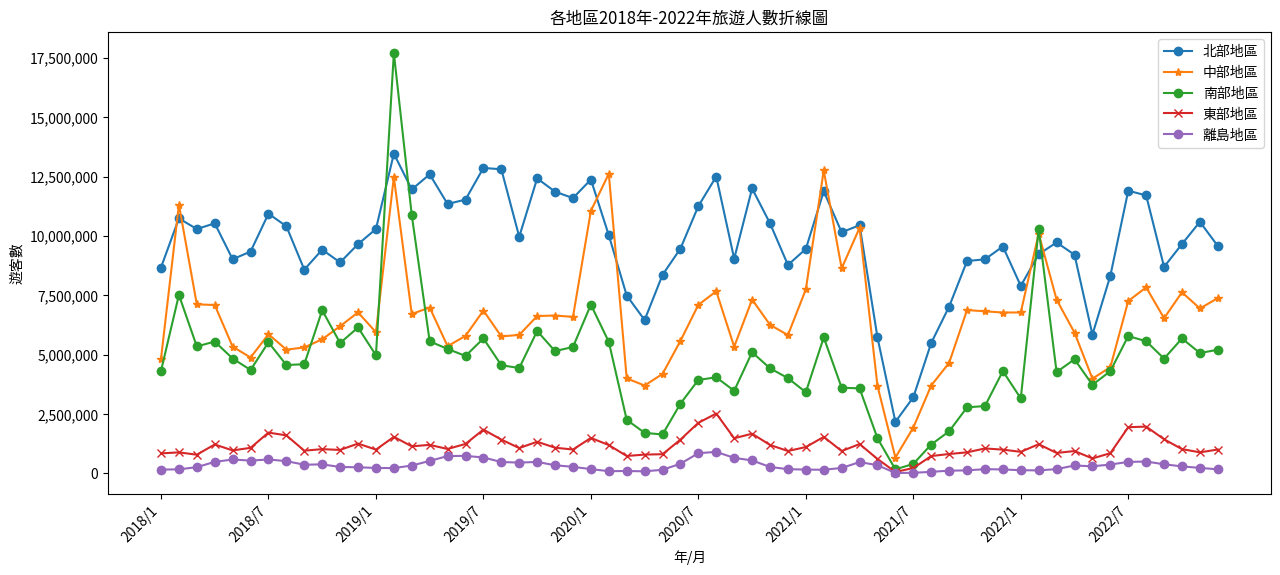

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. 選擇北部地區的資料
df_north = df[df['Area'] == '北部']

# 2. 選擇2018年到2022年的資料
years = [f"{year}/{month}" for year in range(2018, 2023) for month in range(1, 13)]
# 3. 合併計算所有北部地區的數據
df_north_selected_years = df_north[years]
df_north_combined = df_north_selected_years.sum()

df_central = df[df['Area'] == '中部']
df_central_combined = df_central[years].sum()

df_south = df[df['Area'] == '南部']
df_south_combined = df_south[years].sum()

df_east = df[df['Area'] == '東部']
df_east_combined = df_east[years].sum()

df_island = df[df['Area'] == '離島']
df_island_combined = df_island[years].sum()

# 5. 繪製折線圖
plt.figure(figsize=(15, 6))
plt.plot(range(len(df_north_combined)), df_north_combined.values, marker='o', label='北部地區')
plt.plot(range(len(df_central_combined)), df_central_combined.values, marker='*', label='中部地區')
plt.plot(range(len(df_south_combined)), df_south_combined.values, marker='o', label='南部地區')
plt.plot(range(len(df_east_combined)), df_east_combined.values, marker='x', label='東部地區')
plt.plot(range(len(df_island_combined)), df_island_combined.values, marker='o', label='離島地區')

# 設置 x 軸刻度為年份和月份，每隔6個月顯示一次
ticks = range(0, len(df_north_combined), 6)
tick_labels = df_north_combined.index[::6]  # 每6個label 1次

plt.xticks(ticks, labels=tick_labels, rotation=45, ha='right')

plt.title('各地區2018年-2022年旅遊人數折線圖')
plt.xlabel('年/月')
plt.ylabel('遊客數')

# y軸3位數1個逗點
formatter = FuncFormatter(lambda x, _: "{:,}".format(int(x)))
plt.gca().yaxis.set_major_formatter(formatter)

# 添加圖例
plt.legend()

plt.show()


# 過去五年不同地區之個縣市旅遊人數

### 北部地區


In [ ]:
import plotly.express as px

# 統計北部地區的總旅遊人數
total_by_northern_area = df[df['Area'] == '北部'].groupby(['縣市', 'Area'])['Total'].sum().reset_index()

# 繪製柱狀圖
fig = px.bar(total_by_northern_area, x='縣市', y='Total',
             color='縣市',
             height=600,  # 設定圖表高度
             width=800)   # 設定圖表寬度

# 調整圖表標題和座標軸名稱
fig.update_layout(
    title='2018-2022年北部地區縣市累積旅遊人數柱狀圖',
    xaxis_title='縣市',  # x軸標題
    yaxis_title='旅遊人數',  # y軸標題
    title_x=0.5,  # 標題水平位置，0.5 表示水平置中
    yaxis=dict(
        tickvals=[0, 50000000, 100000000, 150000000, 200000000],  # 刻度位置
        ticktext=['0', '50,000,000', '100,000,000', '150,000,000', '200,000,000']  # 刻度標籤
    )
)

# 顯示圖表
fig.show()


### 中部地區

In [ ]:
# 統計中部地區的總旅遊人數
total_by_northern_area = df[df['Area'] == '中部'].groupby(['縣市', 'Area'])['Total'].sum().reset_index()

# 繪製柱狀圖
fig = px.bar(total_by_northern_area, x='縣市', y='Total',
             color='縣市',
             height=600,  # 設定圖表高度
             width=800)   # 設定圖表寬度

# 調整圖表標題和座標軸名稱
fig.update_layout(
    title='2018-2022年中部地區縣市累積旅遊人數柱狀圖',
    xaxis_title='縣市',  # x軸標題
    yaxis_title='旅遊人數',  # y軸標題
    title_x=0.5,  # 標題水平位置，0.5 表示水平置中
    yaxis=dict(
        tickvals=[0, 50000000, 100000000, 150000000, 200000000],  # 刻度位置
        ticktext=['0', '50,000,000', '100,000,000', '150,000,000', '200,000,000']  # 刻度標籤
    )
)

# 顯示圖表
fig.show()


### 南部地區

In [ ]:
# 統計南部地區的總旅遊人數
total_by_northern_area = df[df['Area'] == '南部'].groupby(['縣市', 'Area'])['Total'].sum().reset_index()

# 繪製柱狀圖
fig = px.bar(total_by_northern_area, x='縣市', y='Total',
             color='縣市',
             height=600,  # 設定圖表高度
             width=800)   # 設定圖表寬度

# 調整圖表標題和座標軸名稱
fig.update_layout(
    title='2018-2022年南部地區縣市累積旅遊人數柱狀圖',
    xaxis_title='縣市',  # x軸標題
    yaxis_title='旅遊人數',  # y軸標題
    title_x=0.5,  # 標題水平位置，0.5 表示水平置中
    yaxis=dict(
        tickvals=[0, 50000000, 100000000, 150000000, 200000000],  # 刻度位置
        ticktext=['0', '50,000,000', '100,000,000', '150,000,000', '200,000,000']  # 刻度標籤
    )
)

# 顯示圖表
fig.show()


### 東部地區

In [ ]:
# 統計東部地區的總旅遊人數
total_by_northern_area = df[df['Area'] == '東部'].groupby(['縣市', 'Area'])['Total'].sum().reset_index()

# 繪製柱狀圖
fig = px.bar(total_by_northern_area, x='縣市', y='Total',
             color='縣市',
             height=600,  # 設定圖表高度
             width=800)   # 設定圖表寬度

# 調整圖表標題和座標軸名稱
fig.update_layout(
    title='2018-2022年東部地區縣市累積旅遊人數柱狀圖',
    xaxis_title='縣市',  # x軸標題
    yaxis_title='旅遊人數',  # y軸標題
    title_x=0.5,  # 標題水平位置，0.5 表示水平置中
    yaxis=dict(
        tickvals=[0, 10000000, 20000000, 30000000, 40000000],  # 刻度位置
        ticktext=['0', '10,000,000', '20,000,000', '30,000,000', '40,000,000']  # 刻度標籤
    )
)

# 顯示圖表
fig.show()


### 離島地區

In [ ]:
# 統計離島地區的總旅遊人數
total_by_northern_area = df[df['Area'] == '離島'].groupby(['縣市', 'Area'])['Total'].sum().reset_index()

# 繪製柱狀圖
fig = px.bar(total_by_northern_area, x='縣市', y='Total',
             color='縣市',
             height=600,  # 設定圖表高度
             width=800)   # 設定圖表寬度

# 調整圖表標題和座標軸名稱
fig.update_layout(
    title='2018-2022年離島地區縣市累積旅遊人數柱狀圖',
    xaxis_title='縣市',  # x軸標題
    yaxis_title='旅遊人數',  # y軸標題
    title_x=0.5,  # 標題水平位置，0.5 表示水平置中
    yaxis=dict(
        tickvals=[0, 2500000, 5000000, 7500000, 10000000],  # 刻度位置
        ticktext=['0', '2,500,000', '5,000,000', '7,500,000', '10,000,000']  # 刻度標籤
    )
)

# 顯示圖表
fig.show()


# 過去五年最多人造訪的前十個景點

In [ ]:
# 在缺失的欄位名填入新欄位名
# 使用以下代碼將第1列的列名更改為"new_column_name"
df = df.rename(columns={df.columns[0]: "new_column_name"})
#第一個new_column_name改成"chi_Location"，第2個new_column_name改成"chi_Scenic Spots	"
df.columns.values[0] = 'chi_Location'
df.columns.values[2] = 'chi_Scenic Spots'
df.head()

,chi_Location,Location,chi_Scenic Spots,Scenic Spots,2018/1,2018/2,2018/3,2018/4,2018/5,2018/6,...,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12,Total,Area
0,臺北市,Taipei City,陽明山遊客中心,Yangmingshan Visitor Center,18832,52386,16896,15409,17161,52793,...,3517,7594,14315,11911,7465,5787,6438,6593,786812,北部
1,臺北市,Taipei City,陽明書屋,Yangmingshuwu,1616,2745,2811,13045,11270,10926,...,2617,3996,4746,4770,3297,2896,3858,3078,378151,北部
2,臺北市,Taipei City,陽明公園,Yangming Park,8750,247131,891890,26500,23500,24400,...,219193,207641,296942,362586,203882,184476,330665,137314,7988649,北部
3,臺北市,Taipei City,大屯遊憩區,Datun Recreation Area,30588,52168,33536,47707,65776,83168,...,23947,36476,49299,42514,26437,23972,22245,17453,2459375,北部
4,臺北市,Taipei City,龍鳳谷遊憩區,Longfonggu Recreation Area,27405,45304,59814,160759,29675,23714,...,22051,20289,22630,22804,25921,26214,23908,28361,2738243,北部


In [ ]:
# 按總遊客數降序排列，選前10名景點
df_sorted = df.sort_values(by='Total', ascending=False)

# 選取前10名景點
top_10_spots = df_sorted.head(10)
top_10_spots_df = pd.DataFrame(top_10_spots[['chi_Scenic Spots', 'Scenic Spots', 'Total']].reset_index(drop=True))

print(top_10_spots_df)

0 chi_Scenic Spots                                Scenic Spots     Total
0    東豐自行車綠廊及后豐鐵馬道  Dongfong Green Bikeway and Houfeng Bikeway  39870703
1           南鯤鯓代天府                Daitianfu Temple, Nankunshen  33463100
2       林口三井Outlet                          MITSUI Outlet Park  31737661
3              草悟道                        Calligraphy Greenway  29596707
4            北港朝天宮                     BeiGang ChaoTian Temple  29296000
5          麗寶樂園渡假村                               LihPao Resort  28102120
6     獅頭山風景區(新竹地區)    Lion’s Head Mountain Scenic Area-Hsinchu  25631991
7              佛光山                                 Foguangshan  25394006
8            旗津風景區                               Cijin Seaside  24623761
9           松山文創園區         Songshan Cultural and Creative Park  21978063


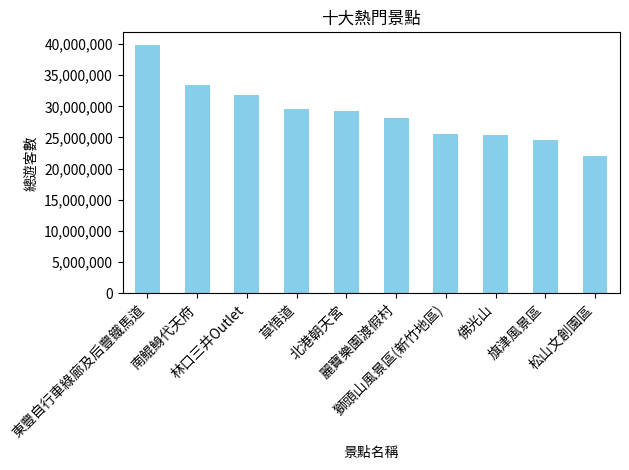

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 設定畫布大小
figsize = (40, 60)

# 繪製長條圖
ax = plt.gca()
top_10_spots_df.plot(kind='bar', x='chi_Scenic Spots', y='Total', color='skyblue', legend=False, ax=ax)

# 設定 x 軸標籤旋轉
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 設定 x 軸標籤名稱
plt.xlabel('景點名稱')
# 設定 y 軸標籤名稱
plt.ylabel('總遊客數')
# 設定標題
plt.title('十大熱門景點')

# 不要顯示科學記號
plt.ticklabel_format(style='plain', axis='y')

# 自定義 y 軸格式，每三位數一個逗號
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))

# 調整布局
plt.tight_layout()

# 顯示圖形
plt.show()


In [ ]:
#在top_10_spots_df中新增"Class"欄位
top_10_spots_df['Class'] = None

# 如果top_10_spots_df的"chi_Scenic Spots"欄位中的景點名稱與class_df的"Scenic Spots"欄位中的景點名稱相同，則將class_df中的"Class"欄位的值填入top_10_spots_df中的"Class"欄位
for i in range(len(top_10_spots_df)):
    for j in range(len(class_df)):
        if top_10_spots_df.iloc[i, 0] == class_df.iloc[j, 2]:
            top_10_spots_df.iloc[i, 3] = class_df.iloc[j, 1]  # 對應到類別
print(top_10_spots_df)

0 chi_Scenic Spots                                Scenic Spots     Total  \
0    東豐自行車綠廊及后豐鐵馬道  Dongfong Green Bikeway and Houfeng Bikeway  39870703   
1           南鯤鯓代天府                Daitianfu Temple, Nankunshen  33463100   
2       林口三井Outlet                          MITSUI Outlet Park  31737661   
3              草悟道                        Calligraphy Greenway  29596707   
4            北港朝天宮                     BeiGang ChaoTian Temple  29296000   
5          麗寶樂園渡假村                               LihPao Resort  28102120   
6     獅頭山風景區(新竹地區)    Lion’s Head Mountain Scenic Area-Hsinchu  25631991   
7              佛光山                                 Foguangshan  25394006   
8            旗津風景區                               Cijin Seaside  24623761   
9           松山文創園區         Songshan Cultural and Creative Park  21978063   

0                  Class  
0                 Others  
1                Temples  
2                 Others  
3                 Others  
4                Temples  
5

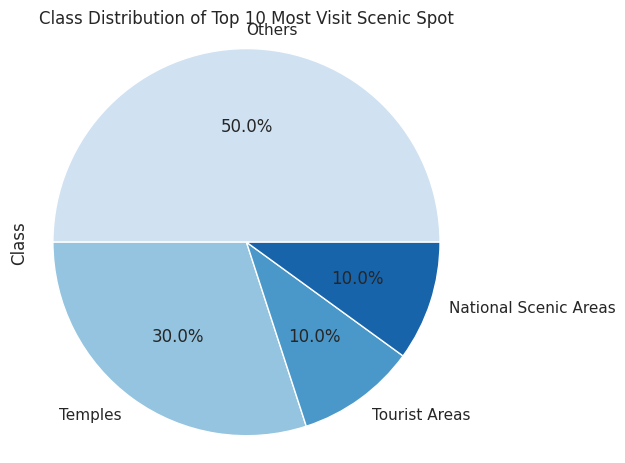

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
figsize = (20, 15)

# 繪製圓餅圖，使用 Seaborn 的 color_palette
colors = sns.color_palette('Blues', len(top_10_spots_df['Class'].unique()))
top_10_spots_df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, colors=colors)

plt.title('Class Distribution of Top 10 Most Visit Scenic Spot')

# 調整圖形與標題之間的距離
plt.subplots_adjust(top=1.2)

# 使圓餅圖比例相等
plt.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
#手動更改類型
adj_top_10_spots_df = top_10_spots_df.copy()

adj_top_10_spots_df.iloc[0, 3] = 'Bikeway'
adj_top_10_spots_df.iloc[2, 3] = 'Shopping Mall'
adj_top_10_spots_df.iloc[3, 3] = 'Creative Park'
adj_top_10_spots_df.iloc[5, 3] = 'Resort'
adj_top_10_spots_df.iloc[6, 3] = 'Scenic Areas'
adj_top_10_spots_df.iloc[8, 3] = 'Scenic Areas'
adj_top_10_spots_df.iloc[9, 3] = 'Creative Park'
print(adj_top_10_spots_df)

0 chi_Scenic Spots                                Scenic Spots     Total  \
0    東豐自行車綠廊及后豐鐵馬道  Dongfong Green Bikeway and Houfeng Bikeway  39870703   
1           南鯤鯓代天府                Daitianfu Temple, Nankunshen  33463100   
2       林口三井Outlet                          MITSUI Outlet Park  31737661   
3              草悟道                        Calligraphy Greenway  29596707   
4            北港朝天宮                     BeiGang ChaoTian Temple  29296000   
5          麗寶樂園渡假村                               LihPao Resort  28102120   
6     獅頭山風景區(新竹地區)    Lion’s Head Mountain Scenic Area-Hsinchu  25631991   
7              佛光山                                 Foguangshan  25394006   
8            旗津風景區                               Cijin Seaside  24623761   
9           松山文創園區         Songshan Cultural and Creative Park  21978063   

0          Class  
0        Bikeway  
1        Temples  
2  Shopping Mall  
3  Creative Park  
4        Temples  
5         Resort  
6   Scenic Areas  
7        Te

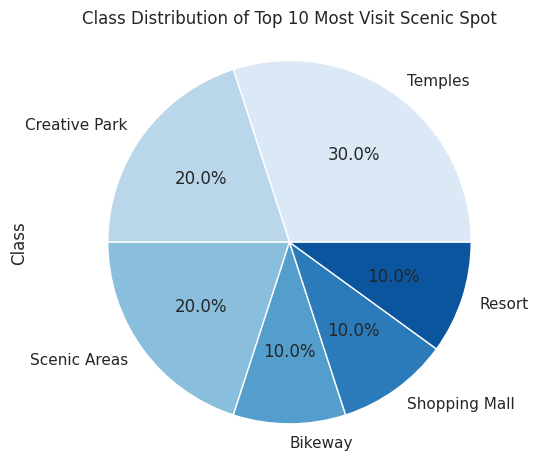

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
figsize = (20, 15)

# 繪製圓餅圖，使用 Seaborn 的 color_palette
colors = sns.color_palette('Blues', len(adj_top_10_spots_df['Class'].unique()))
adj_top_10_spots_df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, colors=colors)

plt.title('Class Distribution of Top 10 Most Visit Scenic Spot')

# 調整圖形與標題之間的距離
plt.subplots_adjust(top=1.2)

# 使圓餅圖比例相等
plt.axis('equal')

plt.tight_layout()
plt.show()

# 平均旅遊天數以及住宿方式

In [ ]:
travel_days = pd.read_csv('旅遊天數.csv')
travel_days.head()

,旅遊天數,2018,2019,2020,2021,2022
0,一天,66.40,66.40,66.40,71.90,71.40
1,二天,20.20,21.90,20.20,18.20,17.80
2,三天,9.90,8.90,9.90,7.30,8.10
3,四天及以上,3.50,2.70,3.50,2.60,2.70
4,平均旅遊天數,1.49,1.51,1.54,1.45,1.47


In [ ]:
accommodation = pd.read_csv('住宿方式.csv')
accommodation

,住宿方式,2018,2019,2020,2021,2022
0,當日來回、沒有在外過夜,68.0,66.4,66.4,71.9,71.4
1,旅館,15.1,17.1,17.0,13.2,14.1
2,親友家（含自家）,7.8,7.0,7.1,7.1,5.7
3,民宿,7.0,7.8,7.8,6.0,7.1
4,露營,1.2,1.0,1.2,1.4,1.3
5,招待所或活動中心,0.7,0.6,0.4,0.3,0.3
6,其他,0.1,0.1,0.2,0.1,0.1


In [ ]:
# 使用 melt 函數整理資料
melted_travel_days = pd.melt(
    travel_days,
    id_vars=['旅遊天數'],
    value_vars=['2018', '2019', '2020', '2021', '2022'],
    var_name='Year',
    value_name='Percentage'
)
# 篩選出不是平均旅遊天數的資料
filtered_travel_days = melted_travel_days[melted_travel_days['旅遊天數'] != '平均旅遊天數']

# 顯示篩選後的 DataFrame
filtered_travel_days

,旅遊天數,Year,Percentage
0,一天,2018,66.4
1,二天,2018,20.2
2,三天,2018,9.9
3,四天及以上,2018,3.5
5,一天,2019,66.4
6,二天,2019,21.9
7,三天,2019,8.9
8,四天及以上,2019,2.7
10,一天,2020,66.4
11,二天,2020,20.2


In [ ]:
average_travel_days = travel_days.iloc[-1, 1:].reset_index()
average_travel_days.columns = ['Year', 'Average Travel Days']

# 顯示新的 DataFrame
average_travel_days


,Year,Average Travel Days
0,2018,1.49
1,2019,1.51
2,2020,1.54
3,2021,1.45
4,2022,1.47


In [ ]:
import plotly.graph_objects as go

# 創建一個 Figure 物件
fig = go.Figure()

# 將每一個旅遊天數添加到 Figure 中
for travel_days in ['一天', '二天', '三天', '四天及以上']:
    df_subset = filtered_travel_days[filtered_travel_days['旅遊天數'] == travel_days]
    fig.add_trace(go.Bar(
        x=df_subset['Year'],
        y=df_subset['Percentage'],
        name=travel_days
    ))

# 設定圖表標題及標籤
fig.update_layout(
    title='不同年份的旅遊天數分佈',
    xaxis_title='年份',
    yaxis_title='百分比 (%)',
    barmode='stack',  # 設定為堆疊模式
    title_x=0.5
)

# 顯示圖表
fig.show()


### 不同年份的平均旅遊天數


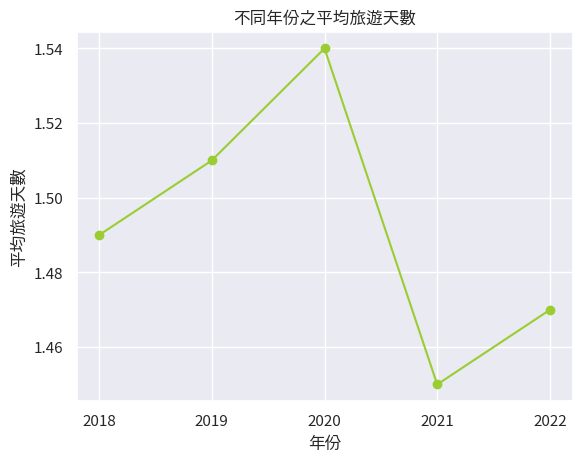

In [ ]:

plt.plot(average_travel_days['Year'], average_travel_days['Average Travel Days'], marker='o', color='yellowgreen')

# 添加標題和標籤
plt.title('不同年份之平均旅遊天數')
plt.xlabel('年份')
plt.ylabel('平均旅遊天數')

# 顯示圖表
plt.show()


### 住宿方式

In [ ]:
accommodation_transposed = accommodation.melt(id_vars=['住宿方式'], var_name='Year', value_name='Percentage')

# 使用 plotly express 繪製堆疊柱狀圖
fig = px.bar(accommodation_transposed, x='Year', y='Percentage', color='住宿方式',
             title='不同年份中不同住宿方式之百分比分佈',
             labels={'Percentage': '百分比（％）', 'Year': '年份', '住宿方式': '住宿方式'},
             height=500, barmode='stack')
fig.update_layout(
    title_x=0.5
)
# 顯示圖表
fig.show()


# 文字雲


## 旅遊景點與縣市文字雲

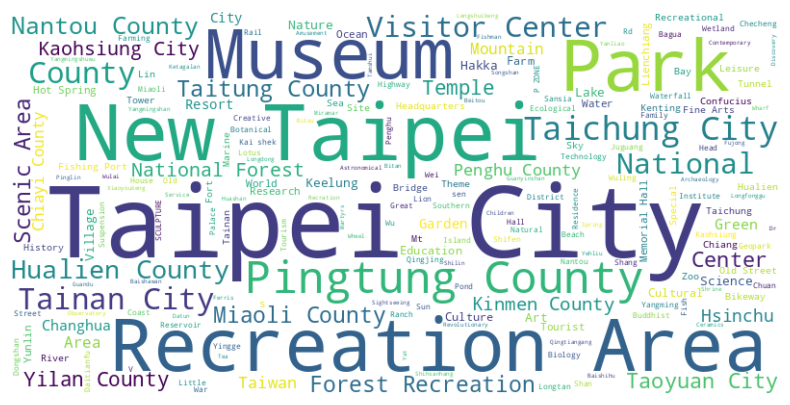

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 合併 Location 和 Scenic_Spots 欄位中的文字
text = ' '.join(df['Location'] + ' ' + df['Scenic Spots'])

# 生成文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 旅遊縣市

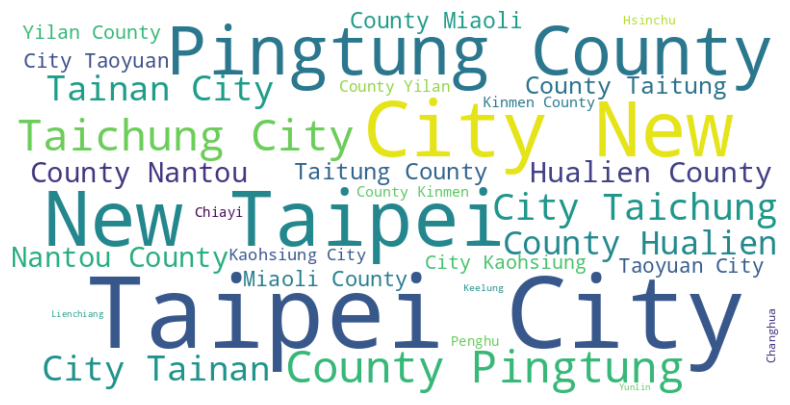

In [ ]:
text1 =  ' '.join(df['Location'])

# 文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 旅遊景點

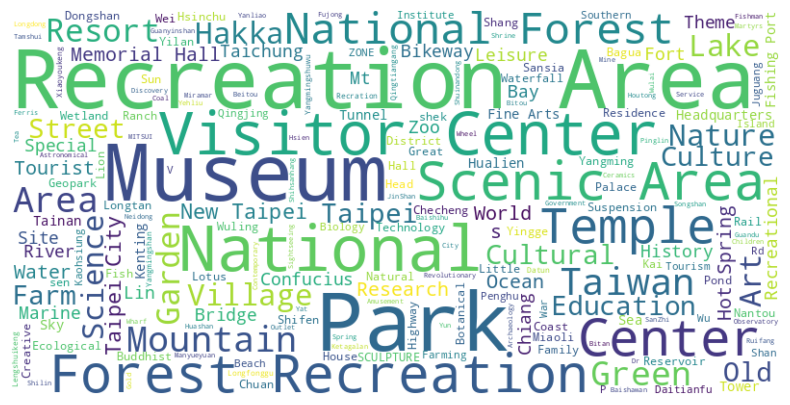

In [ ]:
text2 =  ' '.join(df['Scenic Spots'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()